In [48]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input, Rescaling
from tensorflow.keras.optimizers import RMSprop

In [36]:
train_dir = 'data\\train'
validation_dir = 'data\\test'

train_cats_dir = train_dir + '\cats'
train_dogs_dir = train_dir + '\dogs'

validation_cats_dir = validation_dir + '\cats'
validation_dogs_dir = validation_dir + '\dogs'

In [37]:
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)

Train directory: data\train
Validation directory: data\test


In [38]:
train_cats_fnames = glob.glob(train_cats_dir + '\*.jpg')
train_dogs_fnames = glob.glob(train_dogs_dir + '\*.jpg')

print("5 files in cats subdir:", [f.split('\\')[-1] for f in train_cats_fnames[:5]])
print("5 files in dogs subdir:", [f.split('\\')[-1] for f in train_dogs_fnames[:5]])

5 files in cats subdir: ['cat.0.jpg', 'cat.1.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10002.jpg']
5 files in dogs subdir: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.1000.jpg', 'dog.10000.jpg']


In [39]:
print('Total training cat images:', len(train_cats_fnames))
print('Total training dog images:', len(train_dogs_fnames))

validation_cats_fnames = glob.glob(validation_cats_dir + '\*.jpg')
validation_dogs_fnames = glob.glob(validation_dogs_dir + '\*.jpg')
print('Total validation cat images:', len(validation_cats_fnames))
print('Total validation dog images:', len(validation_dogs_fnames))

Total training cat images: 10000
Total training dog images: 10000
Total validation cat images: 2500
Total validation dog images: 2500


In [40]:
model=Sequential([
    Input(shape=(150,150,3)),
    Rescaling(scale=(1./255)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)       

In [42]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'],
              loss='binary_crossentropy'  
             )

In [43]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=(20),
    label_mode='binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [44]:
SHUFFLE_BUFFER_SIZE=1000
PREFETCH_BUFFER_SIZE=tf.data.AUTOTUNE

train_dataset_final=train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset_final=validation_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [45]:
history=model.fit(
    train_dataset_final,
    epochs=15,
    validation_data=validation_dataset_final,
    verbose=2
)

Epoch 1/15
1000/1000 - 107s - loss: 0.5974 - accuracy: 0.6781 - val_loss: 0.4907 - val_accuracy: 0.7674 - 107s/epoch - 107ms/step
Epoch 2/15
1000/1000 - 100s - loss: 0.4728 - accuracy: 0.7734 - val_loss: 0.4654 - val_accuracy: 0.7818 - 100s/epoch - 100ms/step
Epoch 3/15
1000/1000 - 96s - loss: 0.4065 - accuracy: 0.8151 - val_loss: 0.4467 - val_accuracy: 0.7882 - 96s/epoch - 96ms/step
Epoch 4/15
1000/1000 - 96s - loss: 0.3457 - accuracy: 0.8484 - val_loss: 0.3954 - val_accuracy: 0.8274 - 96s/epoch - 96ms/step
Epoch 5/15
1000/1000 - 89s - loss: 0.2744 - accuracy: 0.8842 - val_loss: 0.3980 - val_accuracy: 0.8344 - 89s/epoch - 89ms/step
Epoch 6/15
1000/1000 - 89s - loss: 0.1979 - accuracy: 0.9207 - val_loss: 0.4645 - val_accuracy: 0.8232 - 89s/epoch - 89ms/step
Epoch 7/15
1000/1000 - 99s - loss: 0.1217 - accuracy: 0.9548 - val_loss: 0.5439 - val_accuracy: 0.8408 - 99s/epoch - 99ms/step
Epoch 8/15
1000/1000 - 97s - loss: 0.0661 - accuracy: 0.9764 - val_loss: 0.8163 - val_accuracy: 0.8308 - 

In [50]:
model.save('model.h5')

d:\Study\SU25\Project\Cats_Dogs_Classification\tf_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
def predict_image(image_path):
    image = tf.keras.utils.load_img(image_path, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image, verbose=0)[0][0]
    if prediction > 0.5:
        print(image_path + " is a dog")
    else:
        print(image_path + " is a cat")

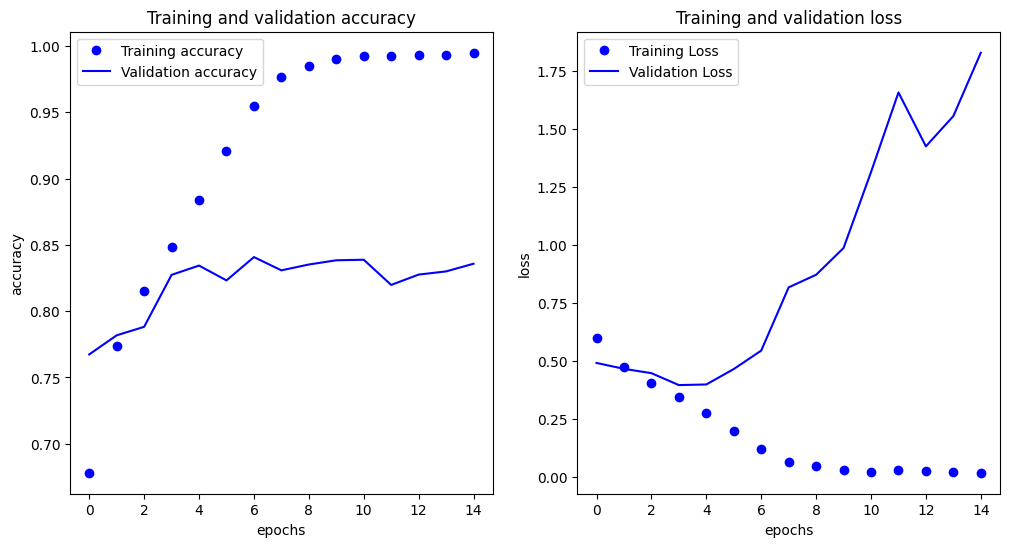

In [51]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)